# Using Python for Research Homework: Week 4, Case Study 2

In this case study, we will continue taking a look at patterns of flight for each of the three birds in our dataset.

In [164]:
# DO NOT EDIT THIS CODE
import pandas as pd
import numpy as np
#birddata = pd.read_csv("https://courses.edx.org/asset-v1:HarvardX+PH526x+2T2019+type@asset+block@bird_tracking.csv", index_col=0)
birddata = pd.read_csv('_datasets/bird_tracking.csv', index_col=0)
birddata.head()

,altitude,date_time,device_info_serial,direction,latitude,longitude,speed_2d,bird_name
0,71,2013-08-15 00:18:08+00,851,-150.469753,49.419860,2.120733,0.150000,Eric
1,68,2013-08-15 00:48:07+00,851,-136.151141,49.419880,2.120746,2.438360,Eric
2,68,2013-08-15 01:17:58+00,851,160.797477,49.420310,2.120885,0.596657,Eric
3,73,2013-08-15 01:47:51+00,851,32.769360,49.420359,2.120859,0.310161,Eric
4,69,2013-08-15 02:17:42+00,851,45.191230,49.420331,2.120887,0.193132,Eric


In [165]:
birddata.shape

(61920, 8)

### Exercise 1

In this case study, we will continue taking a look at patterns of flight for each of the three birds in our dataset. We will group the flight patterns by bird and date, and plot the mean altitude for these groupings.

`pandas` makes it easy to perform basic operations on groups within a dataframe without needing to loop through each value in the dataframe. In this exercise, we will group the dataframe by `birdname` and then find the average `speed_2d` for each bird.

#### Instructions 
- Fill in the code to find the mean altitudes of each bird using the pre-loaded `birddata` dataframe. 

In [166]:
# First, use `groupby()` to group the data by "bird_name".
grouped_birds = birddata.groupby(['bird_name'])

# Now calculate the mean of `speed_2d` using the `mean()` function.
mean_speeds = grouped_birds['speed_2d'].mean()
print(mean_speeds)

# Find the mean `altitude` for each bird.
mean_altitudes = grouped_birds['altitude'].mean()
print(mean_altitudes)

bird_name
Eric     2.300545
Nico     2.908726
Sanne    2.450434
Name: speed_2d, dtype: float64
bird_name
Eric     60.249406
Nico     67.900478
Sanne    29.159922
Name: altitude, dtype: float64


### Exercise 2

In this exercise, we will group the flight times by date and calculate the mean altitude within that day.

#### Instructions 
- Convert `birddata.date_time` to the `pd.datetime` format, and store as `birddata["date"]`.
- Fill in the code to find the mean altitudes for each day.

In [167]:
birddata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61920 entries, 0 to 61919
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   altitude            61920 non-null  int64  
 1   date_time           61920 non-null  object 
 2   device_info_serial  61920 non-null  int64  
 3   direction           61477 non-null  float64
 4   latitude            61920 non-null  float64
 5   longitude           61920 non-null  float64
 6   speed_2d            61477 non-null  float64
 7   bird_name           61920 non-null  object 
dtypes: float64(4), int64(2), object(2)
memory usage: 4.3+ MB


In [168]:
import datetime

# Convert birddata.date_time to the `pd.datetime` format.
timestamps = []
for ix in range(len(birddata)):
    timestamps.append(datetime.datetime.strptime(birddata.date_time.iloc[ix][:-3], "%Y-%m-%d %H:%M:%S"))

birddata.date_time = pd.Series(timestamps, index=birddata.index)
#birddata.date_time = pd.to_datetime(birddata['date_time'], format = "%Y-%m-%d %H:%M:%S")

# Create a new column of day of observation
birddata["date"] = birddata['date_time'].dt.normalize()
birddata.head()

,altitude,date_time,device_info_serial,direction,latitude,longitude,speed_2d,bird_name,date
0,71,2013-08-15 00:18:08,851,-150.469753,49.419860,2.120733,0.150000,Eric,2013-08-15
1,68,2013-08-15 00:48:07,851,-136.151141,49.419880,2.120746,2.438360,Eric,2013-08-15
2,68,2013-08-15 01:17:58,851,160.797477,49.420310,2.120885,0.596657,Eric,2013-08-15
3,73,2013-08-15 01:47:51,851,32.769360,49.420359,2.120859,0.310161,Eric,2013-08-15
4,69,2013-08-15 02:17:42,851,45.191230,49.420331,2.120887,0.193132,Eric,2013-08-15


In [174]:
#birddata[(birddata["date"] == '2013-09-12')]
#birddata.info()
#birddata[(birddata['date'] == '2013-09-12 00:00:00') & (birddata['date_time'] <= '2013-09-12 23:59:59')]
#birddata.head(100)
#birddata = birddata[(birddata["date"] == '2013-09-12')]

# Use `groupby()` to group the data by date.
grouped_bydates = birddata.groupby(["date"])

# Find the mean `altitude` for each date.
mean_altitudes_perday = grouped_bydates['altitude'].mean()
mean_altitudes_perday.loc['2013-09-12']

75.64609053497942

### Exercise 3

In this exercise, we will group the flight times by both bird and date, and calculate the mean altitude for each.

#### Instructions 
- `birddata` already contains the `date` column. To find the average speed for each bird and day, create a new grouped dataframe called `grouped_birdday` that groups the data by both `bird_name` and date.

In [177]:
# Use `groupby()` to group the data by bird and date.
grouped_birdday = birddata.groupby(["bird_name", "date"])
#grouped_birdday

# Find the mean `altitude` for each bird and date.
mean_altitudes_perday = grouped_birdday['altitude'].mean()

# what: Eric on 2013-08-18
mean_altitudes_perday.loc['Eric', '2013-08-18']

121.35365853658537

### Exercise 4

Great! Now find the average speed for each bird and day.

#### Instructions 

- Store these are three `pandas` `Series` objects, one for each bird.
- Use the plotting code provided to plot the average speeds for each bird.

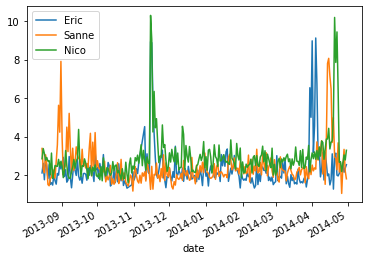

In [178]:
import matplotlib.pyplot as plt

mean_speed_perday = grouped_birdday['speed_2d'].mean()

eric_daily_speed  = mean_speed_perday.loc['Eric'] # Enter your code here.
sanne_daily_speed = mean_speed_perday.loc['Sanne'] # Enter your code here.
nico_daily_speed  = mean_speed_perday.loc['Nico'] # Enter your code here.

eric_daily_speed.plot(label="Eric")
sanne_daily_speed.plot(label="Sanne")
nico_daily_speed.plot(label="Nico")
plt.legend(loc="upper left")
plt.show()

In [179]:
#exercise = what is: bird Nico on 2014-04-04
mean_speed_perday.loc['Nico', '2014-04-04']

2.8324654508684057